<a href="https://colab.research.google.com/github/Kevinlo937/cord-cutting-predicated/blob/main/topMSO_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Load the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Plot styling
import seaborn as sns; # sns.set()  # for plot styling
%matplotlib inline

In [2]:
# Load dataset
ds_doService=pd.read_csv('/content/drive/Othercomputers/我的筆記型電腦/ExpertBook/2025/用戶資料集/TrainData/ds_doService_combo.csv', sep='^')

<ipython-input-2-8df779ad0365>:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  ds_doService=pd.read_csv('/content/drive/Othercomputers/我的筆記型電腦/ExpertBook/2025/用戶資料集/TrainData/ds_doService_combo.csv', sep='^')


In [3]:
ds_doService.head()

,客編,相關編號,工單日期,30天內,60天內,90天內,90天以上,平均等待天數,產品名稱,用戶種類,起日,迄日,系統台,地區,繳別,使用狀態
0,11,16,2023-01-23 15:18:21,1,0,0,0,0.0,CATV,一般收視戶,1999/03/15 00:00:00,NaN,大屯,大里區,3,使用中
1,13,19,2024-08-13 21:53:11,1,0,0,1,0.0,CATV,一般收視戶,2001/11/19 00:00:00,NaN,大屯,大里區,6,使用中
2,28,39,2023-02-15 10:51:09,1,0,0,0,1.0,CATV,一般收視戶,1999/03/01 00:00:00,1999/05/05 00:00:00,大屯,太平區,12,停用
3,47,67,2022-04-15 10:47:15,1,0,0,0,0.0,CATV,一般收視戶,2010/02/23 16:30:17,NaN,大屯,大里區,12,使用中
4,790667,149,2023-03-20 11:37:23,1,0,0,0,0.0,CATV,一般收視戶,1998/10/01 00:00:00,1998/12/31 00:00:00,大屯,大里區,1,停用


In [4]:
# 取出工單日期中的月份，置入新增 '月份' 欄位
ds_doService['月份'] = pd.to_datetime(ds_doService['工單日期']).dt.month

In [5]:
# 了解使用狀態的唯一值有哪些?
print(ds_doService['使用狀態'].unique())
print(ds_doService['產品名稱'].unique())

['使用中' '停用' '拆機中' '維修中' '設備加裝' '暫停' '欠款斷線' '派收中' '移機中']
['CATV' 'DTV' 'CM' 'EPON' 'LiTV' '熊搭心(瑪帛)' 'LINE TV' '統簽網路管理'
 'MESH WIFI加值服務' 'Friday影音' 'HBOGO' '居家智慧攝影機']


In [6]:
# 了解使用狀態不同值的分布數量
print(ds_doService['使用狀態'].value_counts())
print(ds_doService['產品名稱'].value_counts())

使用狀態
使用中     263831
停用       25166
拆機中       6519
維修中       2683
欠款斷線      1482
暫停         580
設備加裝       396
移機中         17
派收中         13
Name: count, dtype: int64
產品名稱
DTV              238056
EPON              26733
CM                23377
CATV              11991
LiTV                317
LINE TV             183
MESH WIFI加值服務        12
居家智慧攝影機               7
HBOGO                 5
統簽網路管理                3
熊搭心(瑪帛)               2
Friday影音              1
Name: count, dtype: int64


In [7]:
# ds_doService 中僅保留使用狀態為 '使用中'、'停用'、'拆機中'、'欠款斷線' 等四種，其餘刪掉
ds_doService = ds_doService[ds_doService['使用狀態'].isin(['使用中', '停用'])]
# ds_doService 中僅保留四種產品，其餘刪掉
ds_doService = ds_doService[ds_doService['產品名稱'].isin(['EPON', 'CM'])]

In [8]:
# 了解使用狀態不同值的分布數量
print(ds_doService['使用狀態'].value_counts())
print(ds_doService['產品名稱'].value_counts())

使用狀態
使用中    42118
停用      5761
Name: count, dtype: int64
產品名稱
EPON    25801
CM      22078
Name: count, dtype: int64


In [9]:
# 安装中文字体（Noto Sans CJK，支持中文）
!apt-get install -y fonts-noto-cjk

import matplotlib.pyplot as plt
from matplotlib import font_manager

# 指定Noto字体的绝对路径（Colab路径）
font_path = '/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc'

# 动态加载字体
font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = font_manager.FontProperties(fname=font_path).get_name()

# 验证当前字体
print("当前生效字体:", plt.rcParams['font.family'])

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  fonts-noto-cjk-extra
The following NEW packages will be installed:
  fonts-noto-cjk
0 upgraded, 1 newly installed, 0 to remove and 30 not upgraded.
Need to get 61.2 MB of archives.
After this operation, 93.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-cjk all 1:20220127+repack1-1 [61.2 MB]
Fetched 61.2 MB in 2s (26.3 MB/s)
Selecting previously unselected package fonts-noto-cjk.
(Reading database ... 126315 files and directories currently installed.)
Preparing to unpack .../fonts-noto-cjk_1%3a20220127+repack1-1_all.deb ...
Unpacking fonts-noto-cjk (1:20220127+repack1-1) ...
Setting up fonts-noto-cjk (1:20220127+repack1-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
当前生效字体: ['Noto Sans CJK JP']


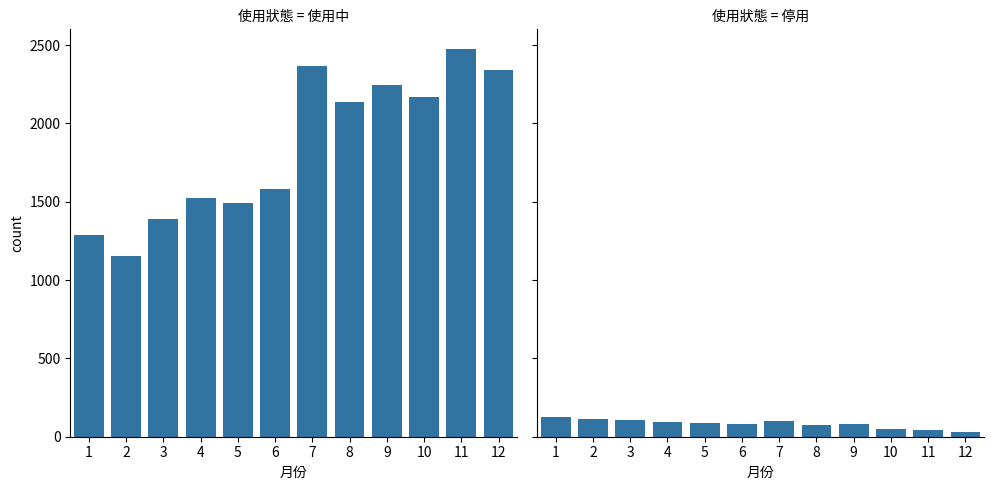

In [10]:
# 劃出依不同月分，各使用狀態的數量分布值
# sns.catplot(x='月份', col='使用狀態', data=ds_doService, kind='count')
# 篩選出工單日期年份為 2024 年的資料
filtered_data = ds_doService[pd.to_datetime(ds_doService['工單日期']).dt.year == 2024]

# 使用篩選後的資料繪製圖表
sns.catplot(x='月份', col='使用狀態', data=filtered_data, kind='count')

<Axes: xlabel='使用狀態', ylabel='count'>

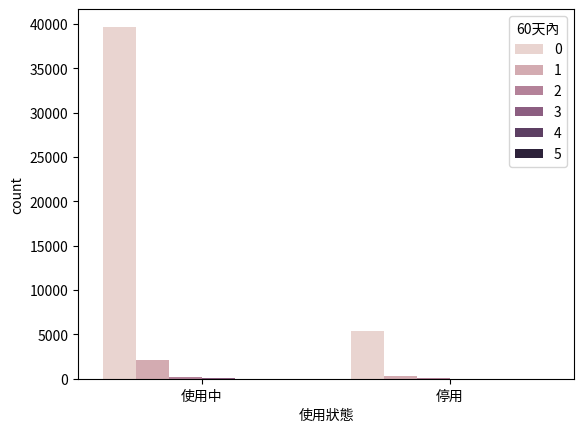

In [11]:
sns.countplot(x='使用狀態', hue='60天內', data=ds_doService)

<Axes: xlabel='使用狀態', ylabel='count'>

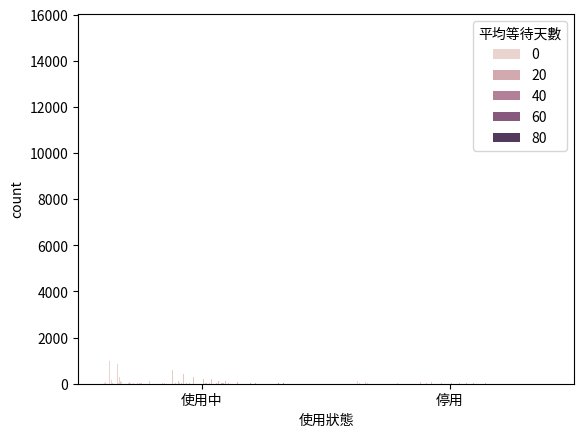

In [12]:
sns.countplot(x='使用狀態', hue='平均等待天數', data=ds_doService)

<Axes: xlabel='系統台', ylabel='Count'>

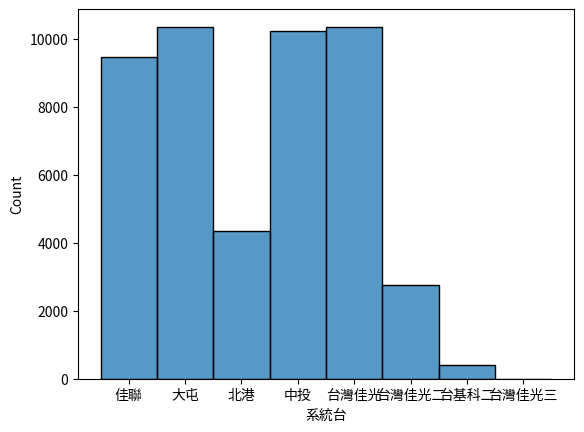

In [13]:
sns.histplot(ds_doService['系統台'])

In [14]:
ds_doService.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47879 entries, 10197 to 300684
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   客編      47879 non-null  int64  
 1   相關編號    47879 non-null  int64  
 2   工單日期    47879 non-null  object 
 3   30天內    47879 non-null  int64  
 4   60天內    47879 non-null  int64  
 5   90天內    47879 non-null  int64  
 6   90天以上   47879 non-null  int64  
 7   平均等待天數  47879 non-null  float64
 8   產品名稱    47879 non-null  object 
 9   用戶種類    47879 non-null  object 
 10  起日      47879 non-null  object 
 11  迄日      8641 non-null   object 
 12  系統台     47879 non-null  object 
 13  地區      47879 non-null  object 
 14  繳別      47879 non-null  int64  
 15  使用狀態    47879 non-null  object 
 16  月份      47879 non-null  int32  
dtypes: float64(1), int32(1), int64(7), object(8)
memory usage: 6.4+ MB


In [15]:
# 分析ds_biService 中使用狀態欄位與 '30天內' 、'60天內' 、'90天內'、 '90天以上' 等四個欄位的共相關性
# 步驟 1： 將使用狀態欄位轉換為數值表示
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
ds_doService['使用狀態_數值'] = le.fit_transform(ds_doService['使用狀態'])

In [16]:
# 將 '工單日期' 欄位名稱改為  '最末工單日期'
ds_doService.rename(columns={'工單日期': '最末工單日期'}, inplace=True)

In [17]:
# 畫出ds_biService 中'起日'欄位所屬年份在不同年份的計數統計
ds_doService['工單年份'] = pd.to_datetime(ds_doService['最末工單日期']).dt.year

In [23]:
ds_doService.head()

,客編,相關編號,30天內,60天內,90天內,90天以上,平均等待天數,產品名稱,用戶種類,繳別,月份,使用狀態_數值
10197,679626,753689,1,0,0,1,0.0,CM,一般收視戶,1,4,0
10198,679655,753721,2,0,0,0,0.5,EPON,一般收視戶,1,4,0
10199,679698,753768,1,0,0,3,0.5,EPON,一般收視戶,1,3,0
10200,679710,753780,1,0,0,1,1.5,CM,一般收視戶,12,12,0
10202,679729,753799,1,0,0,0,0.0,EPON,一般收視戶,12,7,0


In [24]:
ds_doService.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47879 entries, 10197 to 300684
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   客編       47879 non-null  int64  
 1   相關編號     47879 non-null  int64  
 2   30天內     47879 non-null  int64  
 3   60天內     47879 non-null  int64  
 4   90天內     47879 non-null  int64  
 5   90天以上    47879 non-null  int64  
 6   平均等待天數   47879 non-null  float64
 7   產品名稱     47879 non-null  object 
 8   用戶種類     47879 non-null  object 
 9   繳別       47879 non-null  int64  
 10  月份       47879 non-null  int32  
 11  使用狀態_數值  47879 non-null  int64  
dtypes: float64(1), int32(1), int64(8), object(2)
memory usage: 5.6+ MB


In [22]:
# 刪 column
ds_doService.drop(['最末工單日期', '起日', '迄日', '系統台', '地區', '使用狀態', '工單年份'], axis=1, inplace=True)

KeyError: "['最末工單日期', '起日', '迄日', '系統台', '地區', '使用狀態', '工單年份'] not found in axis"

In [28]:
ds_doService.drop(['用戶種類'], axis=1, inplace=True)

In [26]:
print(ds_doService['用戶種類'].unique())

['一般收視戶']


In [27]:
le = LabelEncoder()
ds_doService['產品名稱_數值'] = le.fit_transform(ds_doService['產品名稱'])

In [30]:
ds_doService.drop(['產品名稱'], axis=1, inplace=True)

In [33]:
ds_doService.drop(['客編', '月份','相關編號' ], axis=1, inplace=True)

In [34]:
ds_doService.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47879 entries, 10197 to 300684
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   30天內     47879 non-null  int64  
 1   60天內     47879 non-null  int64  
 2   90天內     47879 non-null  int64  
 3   90天以上    47879 non-null  int64  
 4   平均等待天數   47879 non-null  float64
 5   繳別       47879 non-null  int64  
 6   使用狀態_數值  47879 non-null  int64  
 7   產品名稱_數值  47879 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 4.3 MB


In [35]:
ds_doService.head()

,30天內,60天內,90天內,90天以上,平均等待天數,繳別,使用狀態_數值,產品名稱_數值
10197,1,0,0,1,0.0,1,0,0
10198,2,0,0,0,0.5,1,0,1
10199,1,0,0,3,0.5,1,0,1
10200,1,0,0,1,1.5,12,0,0
10202,1,0,0,0,0.0,12,0,1


In [47]:
print(ds_doService['使用狀態_數值'].value_counts())

使用狀態_數值
0    42118
1     5761
Name: count, dtype: int64


In [37]:
y = ds_doService['使用狀態_數值']
X = ds_doService.drop('使用狀態_數值', axis=1)

In [40]:
# Split the data into a training set and a testing set
from sklearn.model_selection import train_test_split

# 建立 training & testing sets：
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [41]:
# 建立邏輯迴歸 Training model：
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

# 訓練模型
logmodel.fit(X_train, y_train)


LogisticRegression()

In [42]:
# Prediction：
predictions = logmodel.predict(X_test)

In [43]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
# Model Evaluation (模型評估)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     16878
           1       0.00      0.00      0.00      2274

    accuracy                           0.88     19152
   macro avg       0.44      0.50      0.47     19152
weighted avg       0.78      0.88      0.83     19152



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [45]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[16878     0]
 [ 2274     0]]


In [46]:
tn,fp,fn,tp = confusion_matrix(y_test,predictions).ravel()
print('TN:', tn)
print('FP:', fp)
print('FN:', fn)
print('TP:', tp)
print("Accuracy:", (tp+tn)/(tp+tn+fp+fn))

TN: 16878
FP: 0
FN: 2274
TP: 0
Accuracy: 0.881265664160401


In [48]:
!pip install imbalanced-learn

In [50]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [51]:
# 訓練模型
logmodel.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [52]:
# Prediction：
predictions = logmodel.predict(X_test)

In [53]:
# Model Evaluation (模型評估)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.56      0.70     16878
           1       0.15      0.58      0.24      2274

    accuracy                           0.56     19152
   macro avg       0.53      0.57      0.47     19152
weighted avg       0.82      0.56      0.64     19152



In [54]:
print(confusion_matrix(y_test,predictions))

[[9508 7370]
 [ 962 1312]]


In [55]:
tn,fp,fn,tp = confusion_matrix(y_test,predictions).ravel()
print('TN:', tn)
print('FP:', fp)
print('FN:', fn)
print('TP:', tp)
print("Accuracy:", (tp+tn)/(tp+tn+fp+fn))

TN: 9508
FP: 7370
FN: 962
TP: 1312
Accuracy: 0.5649540517961571


In [56]:
ds_doService.head()

,30天內,60天內,90天內,90天以上,平均等待天數,繳別,使用狀態_數值,產品名稱_數值
10197,1,0,0,1,0.0,1,0,0
10198,2,0,0,0,0.5,1,0,1
10199,1,0,0,3,0.5,1,0,1
10200,1,0,0,1,1.5,12,0,0
10202,1,0,0,0,0.0,12,0,1


In [57]:
ds_doService.to_csv('ds_numService.csv', index=False, sep='^')